Attach Google Drive (NOTE: images stored in personal Google Drive -- ***not*** downloaded directly from Kaggle)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing and Parsing data set

In [2]:
import os  # need to parse directories/files
import pandas as pd
import matplotlib.pyplot as plt

dir_name = '/content/gdrive/My Drive/Chessman-image-dataset/Chess'
dir_chess_class = os.listdir(dir_name) # get all classes under main chess folder
print(dir_chess_class)
print()

dir_chess_filepaths = [] # list to contain path to subfolders containing individual classes
for file_path in dir_chess_class:
  dir_chess_filepaths.append(os.path.join(dir_name, file_path))

dir_chess_filepaths

['Rook', 'Queen', 'Knight', 'Pawn', 'Bishop', 'King']



['/content/gdrive/My Drive/Chessman-image-dataset/Chess/Rook',
 '/content/gdrive/My Drive/Chessman-image-dataset/Chess/Queen',
 '/content/gdrive/My Drive/Chessman-image-dataset/Chess/Knight',
 '/content/gdrive/My Drive/Chessman-image-dataset/Chess/Pawn',
 '/content/gdrive/My Drive/Chessman-image-dataset/Chess/Bishop',
 '/content/gdrive/My Drive/Chessman-image-dataset/Chess/King']

Visualization of Sample Data (re-comment code in as necessary)

In [3]:
from PIL import Image # needed for JPEG support

def show_images (class_dir, class_name = "MISSING", num_imgs = 5):
  all_images = os.listdir(class_dir)

  plt.figure(figsize=(10,10)) #10 x 10 unit representation
  for idx in range(num_imgs):
    image_path = class_dir + '/' + all_images[idx]

    plt.subplot(num_imgs, num_imgs, idx+1) #5 x 5 subplot within 'figure'
    image = plt.imread(image_path, format='jpg')
    plt.title(class_name)
    plt.imshow(image)

  print(class_name + ' : ' + str(len(all_images)))

In [4]:
# for folders in dir_chess_filepaths:
#   head, tail = os.path.split(folders)
#   show_images(folders, tail)

In [5]:
# TESTING ONLY

# img_path = '/content/gdrive/My Drive/Chessman-image-dataset/Chess/Queen/00000084.jpeg'
# img = plt.imread(img_path)
# plt.imshow(img)

Splitting Data Set and Pre-processing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
dataGenerator = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                   shear_range=0.2, fill_mode='nearest',
                                   validation_split=0.2)


In [8]:
training_set = dataGenerator.flow_from_directory(dir_name, target_size=(150, 150), 
                                                 batch_size=20,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = dataGenerator.flow_from_directory(dir_name, target_size=(150, 150),
                                                   batch_size=30, subset='validation')


Found 443 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


Prepare Model

In [9]:
import tensorflow as tf

In [10]:
# CURRENT: Take 5 Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (1,1), activation='relu'),
    tf.keras.layers.Conv2D(32, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 32)      1056      
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                        

Edit Learning Rate

In [11]:
# DOES NOT SEEM TO RESOLVE DIVERGING ISSUE

# from keras.callbacks import ReduceLROnPlateau
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
#                                             patience=2, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.000005) 
# callback = [learning_rate_reduction]

Training the Model

In [12]:
#
history = model.fit(training_set, epochs=25,validation_data=validation_set)

Epoch 1/25
23/23 [==============================] - 77s 3s/step - loss: 1.7968 - accuracy: 0.1580 - val_loss: 1.7779 - val_accuracy: 0.1927
Epoch 2/25
23/23 [==============================] - 76s 3s/step - loss: 1.7865 - accuracy: 0.1851 - val_loss: 1.7806 - val_accuracy: 0.1927
Epoch 3/25
23/23 [==============================] - 75s 3s/step - loss: 1.7838 - accuracy: 0.1625 - val_loss: 1.7806 - val_accuracy: 0.1927
Epoch 4/25
23/23 [==============================] - 76s 3s/step - loss: 1.7833 - accuracy: 0.1693 - val_loss: 1.7805 - val_accuracy: 0.1927
Epoch 5/25
23/23 [==============================] - 75s 3s/step - loss: 1.7784 - accuracy: 0.1919 - val_loss: 1.7866 - val_accuracy: 0.1927
Epoch 6/25
23/23 [==============================] - 75s 3s/step - loss: 1.7857 - accuracy: 0.1941 - val_loss: 1.7871 - val_accuracy: 0.1835
Epoch 7/25
23/23 [==============================] - 75s 3s/step - loss: 1.7857 - accuracy: 0.1874 - val_loss: 1.7838 - val_accuracy: 0.1835
Epoch 8/25
23/23 [==

Plot Accuracy and Loss

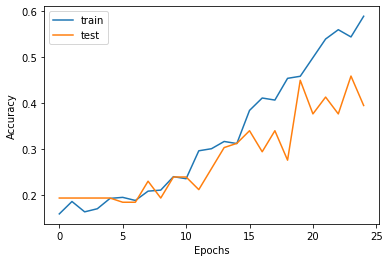

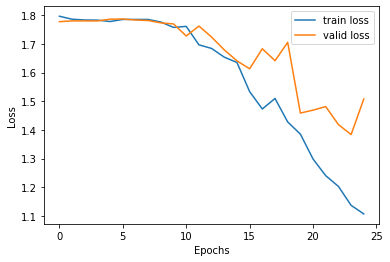

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Confusion Matrix, Heat Graph and Metrics

confusion_matrix:  [[0 5 2 1 5 4]
 [1 3 4 5 1 1]
 [1 8 4 1 3 4]
 [3 3 4 3 4 4]
 [3 1 3 2 2 4]
 [3 5 1 1 3 7]]


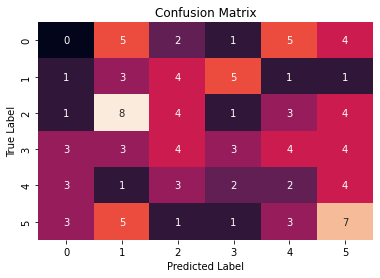


Classification Report
              precision    recall  f1-score   support

        Rook       0.00      0.00      0.00        17
       Queen       0.12      0.20      0.15        15
      Knight       0.22      0.19      0.21        21
        Pawn       0.23      0.14      0.18        21
      Bishop       0.11      0.13      0.12        15
        King       0.29      0.35      0.32        20

    accuracy                           0.17       109
   macro avg       0.16      0.17      0.16       109
weighted avg       0.17      0.17      0.17       109



In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_set, 8)
y_pred = np.argmax(Y_pred, axis=1)
matrix1 = confusion_matrix(validation_set.classes, y_pred)
print("confusion_matrix: ", matrix1)

sns.heatmap(matrix1, annot=True, cbar=False);
plt.ylabel('True Label');
plt.xlabel('Predicted Label');
plt.title('Confusion Matrix');
plt.show()

print('\nClassification Report')
target_names = ['Bishop',
                'King',
                'Rook',
                'Pawn',
                'Queen',
                'Knight']
class_report = classification_report(validation_set.classes, y_pred, target_names=dir_chess_class)
print(class_report)